##### Importerar biblotek 

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')


 ##### Importerar csv filen och döper den till df samt visar information om datan

In [4]:
df = pd.read_csv("diamonds.csv")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None


#####  Visa de första raderna.Kontrollera saknade värden och datatyper

In [5]:
print(df.head())
print(df.isnull().sum())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


##### Rensar datan


In [6]:
# Ta bort rader med orimliga dimensioner
df_clean = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]

# Hantera outliers med IQR för pris
Q1_price = df_clean['price'].quantile(0.25)
Q3_price = df_clean['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price
df_clean = df_clean[(df_clean['price'] >= lower_bound_price) & (df_clean['price'] <= upper_bound_price)]

# Hantera outliers för carat
Q1_carat = df_clean['carat'].quantile(0.25)
Q3_carat = df_clean['carat'].quantile(0.75)
IQR_carat = Q3_carat - Q1_carat
lower_bound_carat = Q1_carat - 1.5 * IQR_carat
upper_bound_carat = Q3_carat + 1.5 * IQR_carat
df_clean = df_clean[(df_clean['carat'] >= lower_bound_carat) & (df_clean['carat'] <= upper_bound_carat)]

# Kontrollera rimliga värden för depth och table (baserat på typiska intervall)
df_clean = df_clean[(df_clean['depth'] >= 50) & (df_clean['depth'] <= 75)]
df_clean = df_clean[(df_clean['table'] >= 40) & (df_clean['table'] <= 80)]

# Spara rensad data
df_clean.to_csv("diamonds_clean.csv", index=False)
print("Rensad data sparad. Antal rader före:", len(df), "efter:", len(df_clean))

Rensad data sparad. Antal rader före: 53940 efter: 50101


##### Genomsnittligt pris per slipkvalitet

In [7]:
avg_price_by_cut = df_clean.groupby('cut')['price'].mean().reset_index()
print(avg_price_by_cut)

         cut        price
0       Fair  3417.887955
1       Good  3235.751033
2      Ideal  2795.720096
3    Premium  3495.766479
4  Very Good  3216.552629


##### Genomsnittligt pris per färg

In [8]:
avg_price_by_color = df_clean.groupby('color')['price'].mean().reset_index()
print(avg_price_by_color)

  color        price
0     D  2693.953281
1     E  2612.063800
2     F  3069.119973
3     G  3213.145387
4     H  3512.656097
5     I  3648.634668
6     J  3829.716926


##### Genomsnittligt pris per klarhet

In [9]:
avg_price_by_clarity = df_clean.groupby('clarity')['price'].mean().reset_index()
print(avg_price_by_clarity)

  clarity        price
0      I1  3053.040128
1      IF  2123.346177
2     SI1  3277.457262
3     SI2  3732.636364
4     VS1  3151.438596
5     VS2  3108.938947
6    VVS1  2118.716063
7    VVS2  2789.785891


##### Beräkna korrelation mellan pris och karat

In [10]:
# Beräkna korrelation
correlation = df_clean[['carat', 'price']].corr()
print("Korrelationsmatris:\n", correlation)

# Korrelation per slipkvalitet
print("\nKorrelation per slipkvalitet:")
for cut in df_clean['cut'].unique():
    subset = df_clean[df_clean['cut'] == cut]
    corr = subset[['carat', 'price']].corr().iloc[0, 1]
    print(f"{cut}: {corr:.3f}")

Korrelationsmatris:
           carat     price
carat  1.000000  0.918855
price  0.918855  1.000000

Korrelation per slipkvalitet:
Ideal: 0.928
Premium: 0.921
Good: 0.921
Very Good: 0.923
Fair: 0.839


##### Visualisera sambandet

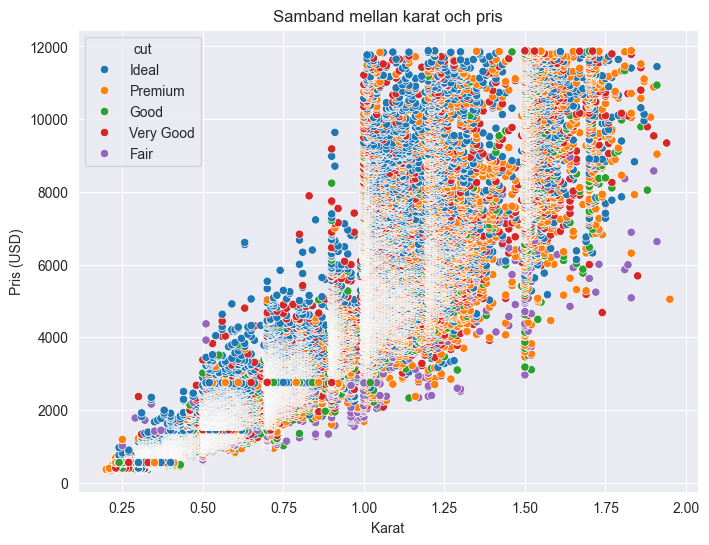

In [11]:
# Scatterplot för karat vs pris
plt.figure(figsize=(8, 6))
sns.scatterplot(x='carat', y='price', hue='cut', data=df_clean)
plt.title("Samband mellan karat och pris")
plt.xlabel("Karat")
plt.ylabel("Pris (USD)")
plt.savefig("carat_vs_price.png")
plt.show()



##### Segmentera genomsnittspris per karat-intervall


Genomsnittspris per karat-intervall:
   carat_range        price
0       0-0.5   839.534390
1     0.5-1.0  2808.195588
2     1.0-1.5  6222.181779
3     1.5-2.0  9255.734645


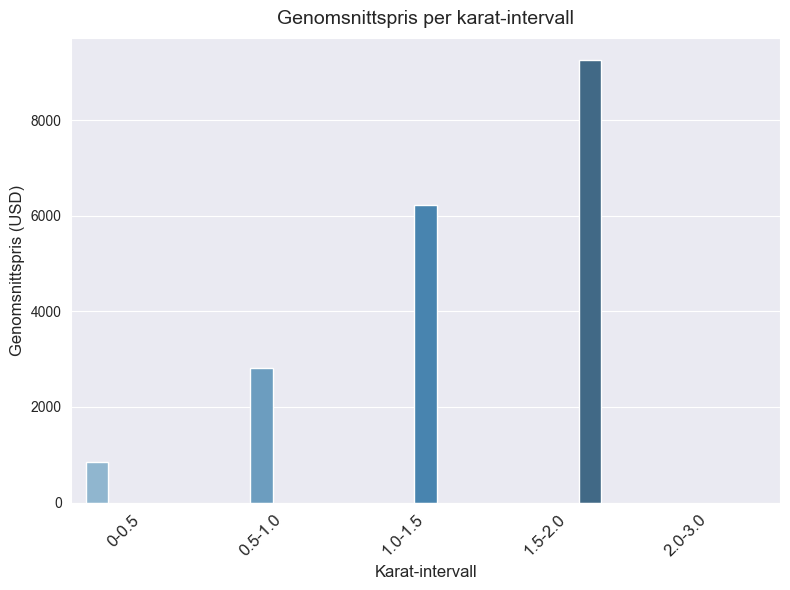

In [12]:
# Skapa karat-intervall
bins = [0, 0.5, 1.0, 1.5, 2.0, 3.0]
labels = ['0-0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0-3.0']
df_clean['carat_range'] = pd.cut(df_clean['carat'], bins=bins, labels=labels)

# Beräkna genomsnittspris per intervall med observed=True
avg_price_by_carat_range = df_clean.groupby('carat_range', observed=True)['price'].mean().reset_index()
print("\nGenomsnittspris per karat-intervall:\n", avg_price_by_carat_range)

# Visualisera
plt.figure(figsize=(8, 6))
sns.barplot(x='carat_range', y='price', hue='carat_range', data=avg_price_by_carat_range, palette='Blues_d', legend=False)
plt.title("Genomsnittspris per karat-intervall", fontsize=14, pad=10)
plt.xlabel("Karat-intervall", fontsize=12)
plt.ylabel("Genomsnittspris (USD)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.savefig("avg_price_by_carat_range.png")
plt.show()


### Marknadsöversikt och Prissimulering

##### För att simulera realtidsmarknaden lägger vi till prisvariation baserad på marknadsförhållanden. Detta hjälper oss förstå hur priser kan fluktuera och påverka affärsstrategier.


In [13]:
# Simulera realtidspriser med marknadsvariation
np.random.seed(42)  # För reproducerbarhet

# Skapa prisvariation baserad på marknadsförhållanden
df['price_variation'] = np.random.normal(0, 0.02, len(df))  # ±2% standardvariation
df['market_factor'] = np.random.normal(1, 0.01, len(df))    # Allmän marknadsfaktor

# Beräkna aktuella priser
df['current_price'] = df['price'] * df['market_factor'] * (1 + df['price_variation'])
df['price_change'] = ((df['current_price'] - df['price']) / df['price']) * 100

# Visa prisstatistik
price_stats = pd.DataFrame({
    'Mått': ['Ursprungligt medelpris', 'Aktuellt medelpris', 'Genomsnittlig förändring',
             'Max prisökning', 'Max prisminskning', 'Standardavvikelse förändring'],
    'Värde': [f"${df['price'].mean():,.0f}", f"${df['current_price'].mean():,.0f}",
              f"{df['price_change'].mean():+.3f}%", f"{df['price_change'].max():+.2f}%",
              f"{df['price_change'].min():+.2f}%", f"{df['price_change'].std():.3f}%"]
})


display(price_stats)

,Mått,Värde
0,Ursprungligt medelpris,"$3,933"
1,Aktuellt medelpris,"$3,933"
2,Genomsnittlig förändring,+0.003%
3,Max prisökning,+9.93%
4,Max prisminskning,-10.22%
5,Standardavvikelse förändring,2.238%


### Korrelationsanalys - Vad Driver Diamantpriser?

##### En av de viktigaste frågorna för Guldfynd är att förstå vilka faktorer som mest påverkar diamantpriser. Detta hjälper med prissättning och inköpsbeslut.

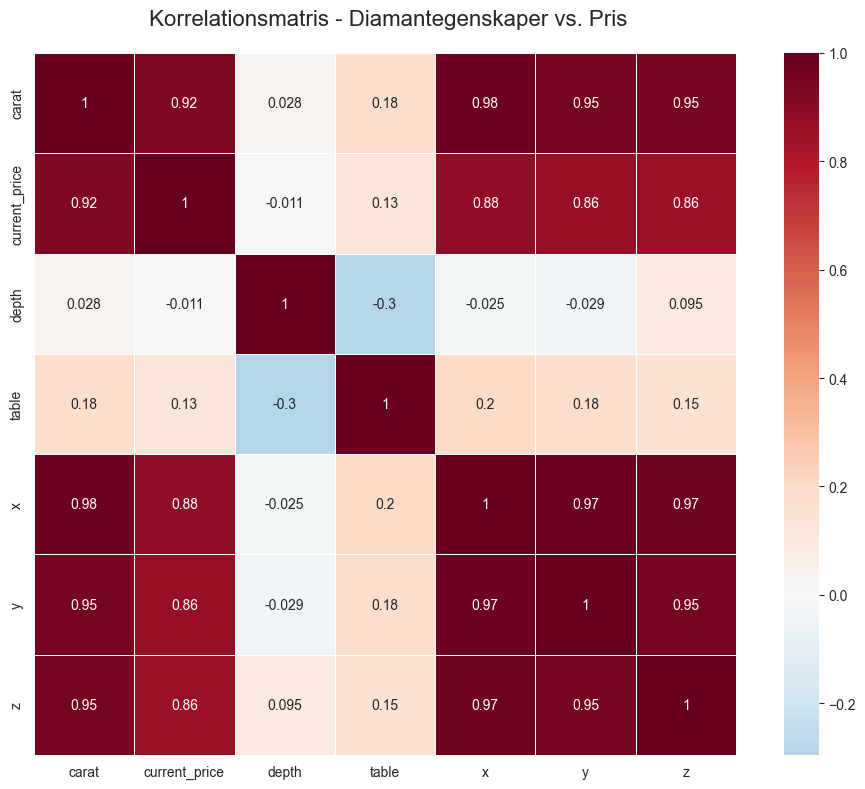

 PRISKORRELATIONER (STYRKA)
carat        : +0.921 🔴 Stark
x            : +0.884 🔴 Stark
y            : +0.865 🔴 Stark
z            : +0.861 🔴 Stark
table        : +0.127 🟢 Svag
depth        : -0.011 🟢 Svag


In [14]:
# Beräkna korrelationer med aktuella priser
numerical_cols = ['carat', 'current_price', 'depth', 'table', 'x', 'y', 'z']
correlation_matrix = df[numerical_cols].corr()

# Skapa korrelations-heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, ax=ax)
plt.title(' Korrelationsmatris - Diamantegenskaper vs. Pris', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Fokusera på priskorrelationer
price_correlations = correlation_matrix['current_price'].sort_values(ascending=False)
print(" PRISKORRELATIONER (STYRKA)")

for var, corr in price_correlations.items():
    if var != 'current_price':
        strength = "🔴 Stark" if abs(corr) > 0.7 else "🟡 Måttlig" if abs(corr) > 0.3 else "🟢 Svag"
        print(f"{var:12} : {corr:+.3f} {strength}")


### Karat vs. Pris - Den Starkaste Drivkraften

##### Karat visar sig ha den starkaste korrelationen med pris. Se analys nedan som undersöker detta samband djupare.

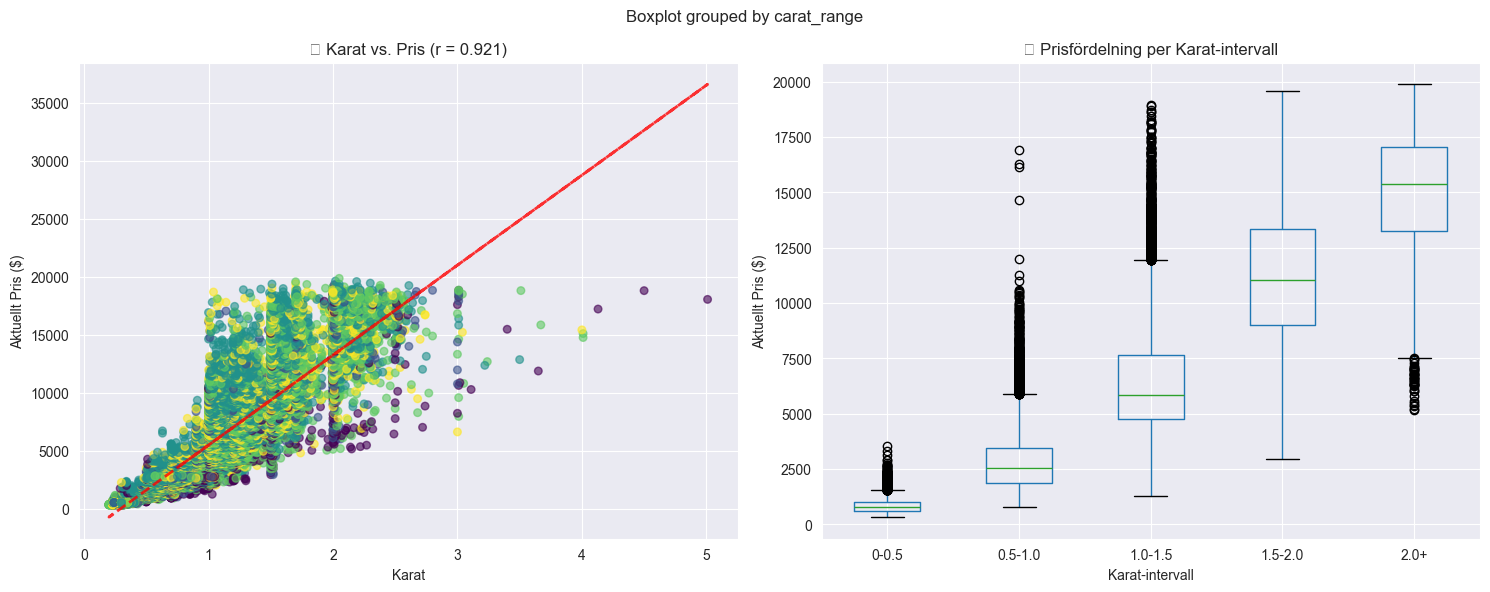

 KARAT-PRIS INSIKTER
• Korrelationsstyrka: 0.921 (Mycket stark)
• Genomsnittspris per karat: $4,009
• Pris ökar exponentiellt med karat-storlek


In [15]:
    # Detaljerad analys av karat-pris sambandet
carat_price_corr = df[['carat', 'current_price']].corr().iloc[0, 1]

# Skapa scatter plot med trendlinje
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot med färgkodning
scatter = ax1.scatter(df['carat'], df['current_price'],
                      c=df['cut'].astype('category').cat.codes,
                      alpha=0.6, s=30, cmap='viridis')
ax1.set_xlabel('Karat')
ax1.set_ylabel('Aktuellt Pris ($)')
ax1.set_title(f'💎 Karat vs. Pris (r = {carat_price_corr:.3f})')

# Lägg till trendlinje
z = np.polyfit(df['carat'], df['current_price'], 1)
p = np.poly1d(z)
ax1.plot(df['carat'], p(df['carat']), "r--", alpha=0.8, linewidth=2)

# Box plot för karat-intervall
df['carat_range'] = pd.cut(df['carat'], bins=[0, 0.5, 1.0, 1.5, 2.0, float('inf')],
                           labels=['0-0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0+'])
df.boxplot(column='current_price', by='carat_range', ax=ax2)
ax2.set_title('💰 Prisfördelning per Karat-intervall')
ax2.set_xlabel('Karat-intervall')
ax2.set_ylabel('Aktuellt Pris ($)')

plt.tight_layout()
plt.show()

print(f" KARAT-PRIS INSIKTER")

print(f"• Korrelationsstyrka: {carat_price_corr:.3f} (Mycket stark)")
print(f"• Genomsnittspris per karat: ${(df['current_price']/df['carat']).mean():,.0f}")
print(f"• Pris ökar exponentiellt med karat-storlek")


### Segmentanalys för Affärsstrategier

##### Analyserar olika marknadssegment för att identifiera möjligheter för lageroptimering och prissättningsstrategier.

In [16]:
# Skapa omfattande segmentanalys
segment_analysis = df.groupby('carat_range').agg({
    'current_price': ['count', 'mean', 'median', 'std', 'min', 'max'],
    'carat': 'mean',
    'price_change': 'mean'
}).round(2)

# Flatten column names
segment_analysis.columns = ['Antal', 'Medelpris', 'Medianpris', 'Std_pris', 'Min_pris', 'Max_pris', 'Medelkarat', 'Prisändring%']

print(" SEGMENTANALYS PER KARAT-INTERVALL")

display(segment_analysis)

# Beräkna affärsmetriker
segment_analysis['Marknadsandel%'] = (segment_analysis['Antal'] / segment_analysis['Antal'].sum() * 100).round(1)
segment_analysis['Omsättning_potentiel'] = (segment_analysis['Antal'] * segment_analysis['Medelpris']).round(0)
segment_analysis['Prisvolatilitet'] = (segment_analysis['Std_pris'] / segment_analysis['Medelpris'] * 100).round(1)

print(" AFFÄRSMETRIKER PER SEGMENT")

for segment in segment_analysis.index:
    data = segment_analysis.loc[segment]
    print(f"\n🔸 {segment} karat:")
    print(f"   Marknadsandel: {data['Marknadsandel%']}%")
    print(f"   Omsättningspotential: ${data['Omsättning_potentiel']:,.0f}")
    print(f"   Prisvolatilitet: {data['Prisvolatilitet']}%")


 SEGMENTANALYS PER KARAT-INTERVALL


,Antal,Medelpris,Medianpris,Std_pris,Min_pris,Max_pris,Medelkarat,Prisändring%
carat_range,,,,,,,,
0-0.5,18932,839.75,784.96,311.04,326.28,3529.02,0.35,-0.01
0.5-1.0,17506,2811.87,2528.26,1306.12,798.53,16930.78,0.72,0.01
1.0-1.5,12060,6513.90,5850.85,2461.42,1261.47,18948.16,1.15,0.01
1.5-2.0,3553,11321.06,11016.58,3085.84,2951.30,19578.42,1.62,-0.01
2.0+,1889,14949.97,15375.23,2718.17,5168.87,19875.30,2.15,0.00


 AFFÄRSMETRIKER PER SEGMENT

🔸 0-0.5 karat:
   Marknadsandel: 35.1%
   Omsättningspotential: $15,898,147
   Prisvolatilitet: 37.0%

🔸 0.5-1.0 karat:
   Marknadsandel: 32.5%
   Omsättningspotential: $49,224,596
   Prisvolatilitet: 46.5%

🔸 1.0-1.5 karat:
   Marknadsandel: 22.4%
   Omsättningspotential: $78,557,634
   Prisvolatilitet: 37.8%

🔸 1.5-2.0 karat:
   Marknadsandel: 6.6%
   Omsättningspotential: $40,223,726
   Prisvolatilitet: 27.3%

🔸 2.0+ karat:
   Marknadsandel: 3.5%
   Omsättningspotential: $28,240,493
   Prisvolatilitet: 18.2%


### Kvalitetsanalys - Cut, Color, Clarity


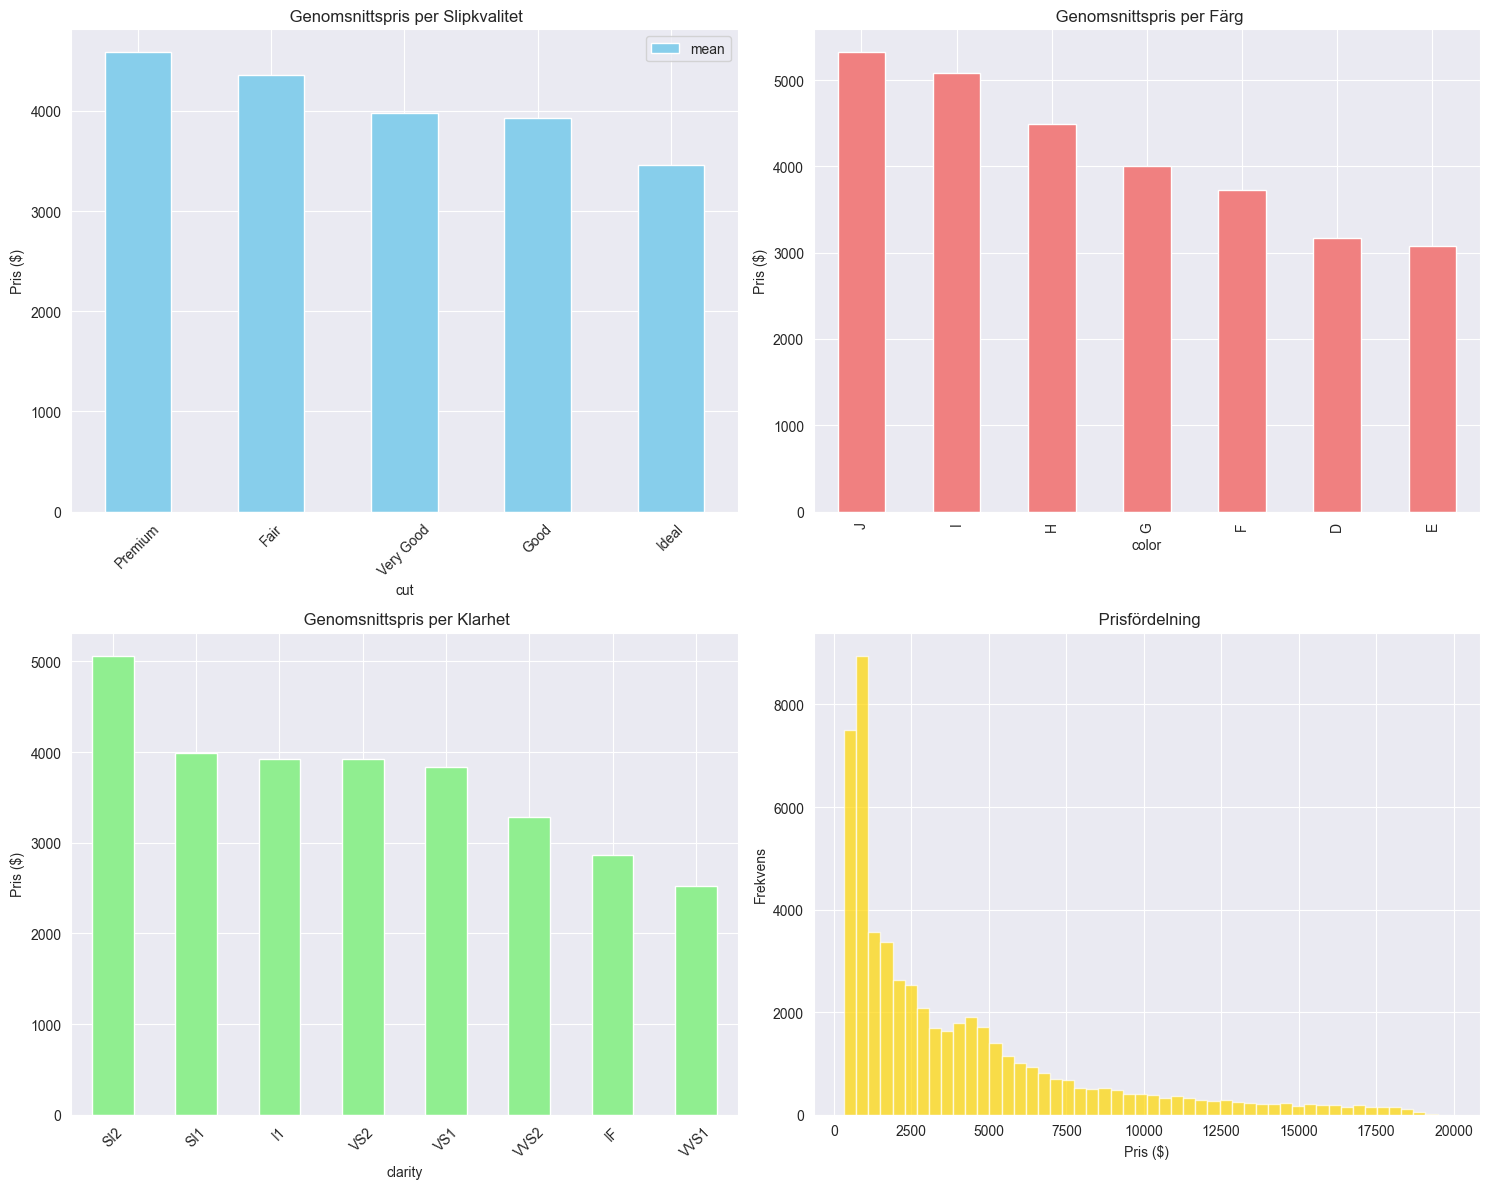

 KVALITETSANALYS - TOP 3 INOM VARJE KATEGORI
 Bästa slipkvaliteter (högsta medelpris):
   1. Premium: $4,584 (13791.0 st)
   2. Fair: $4,362 (1610.0 st)
   3. Very Good: $3,983 (12082.0 st)

 Bästa färger (högsta medelpris):
   1. J: $5,323
   2. I: $5,089
   3. H: $4,488

 Bästa klarhet (högsta medelpris):
   1. SI2: $5,064
   2. SI1: $3,995
   3. I1: $3,927


In [17]:
# Analysera kvalitetsfaktorer
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Cut analysis
cut_analysis = df.groupby('cut')['current_price'].agg(['mean', 'count']).sort_values('mean', ascending=False)
cut_analysis.plot(kind='bar', y='mean', ax=axes[0,0], color='skyblue')
axes[0,0].set_title(' Genomsnittspris per Slipkvalitet')
axes[0,0].set_ylabel('Pris ($)')
axes[0,0].tick_params(axis='x', rotation=45)

# Color analysis
color_analysis = df.groupby('color')['current_price'].mean().sort_values(ascending=False)
color_analysis.plot(kind='bar', ax=axes[0,1], color='lightcoral')
axes[0,1].set_title(' Genomsnittspris per Färg')
axes[0,1].set_ylabel('Pris ($)')

# Clarity analysis
clarity_analysis = df.groupby('clarity')['current_price'].mean().sort_values(ascending=False)
clarity_analysis.plot(kind='bar', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title(' Genomsnittspris per Klarhet')
axes[1,0].set_ylabel('Pris ($)')
axes[1,0].tick_params(axis='x', rotation=45)

# Price distribution
df['current_price'].hist(bins=50, ax=axes[1,1], alpha=0.7, color='gold')
axes[1,1].set_title(' Prisfördelning')
axes[1,1].set_xlabel('Pris ($)')
axes[1,1].set_ylabel('Frekvens')

plt.tight_layout()
plt.show()

# Kvalitetsinsikter
print(" KVALITETSANALYS - TOP 3 INOM VARJE KATEGORI")

print(" Bästa slipkvaliteter (högsta medelpris):")
for i, (cut, price) in enumerate(cut_analysis.head(3).iterrows(), 1):
    print(f"   {i}. {cut}: ${price['mean']:,.0f} ({price['count']} st)")

print(f"\n Bästa färger (högsta medelpris):")
for i, (color, price) in enumerate(color_analysis.head(3).items(), 1):
    print(f"   {i}. {color}: ${price:,.0f}")

print(f"\n Bästa klarhet (högsta medelpris):")
for i, (clarity, price) in enumerate(clarity_analysis.head(3).items(), 1):
    print(f"   {i}. {clarity}: ${price:,.0f}")

### Riskanalys - Prisvolatilitet och Marknadsrisk

##### För att hjälpa Guldfynd fatta informerade beslut analyserar jag prisvolatilitet och risk inom olika segment.

HÖGST RISK (TOP 5)


Avg_Price     CV  Risk_Score
carat_range cut                                    
0.5-1.0     Very Good    2958.44  47.66      105.81
            Premium      2903.40  47.60      105.67
            Good         3058.26  45.75      101.57
0-0.5       Good          786.28  44.44       99.10
0.5-1.0     Ideal        2597.44  43.66       98.23

 LÄGST RISK (TOP 5)


Avg_Price     CV  Risk_Score
carat_range cut                                    
2.0+        Ideal       15584.22  14.55       32.59
            Premium     14980.81  16.84       37.05
            Very Good   15148.51  16.64       37.77
            Good        14619.44  18.90       43.85
1.5-2.0     Ideal       11865.49  25.02       53.04

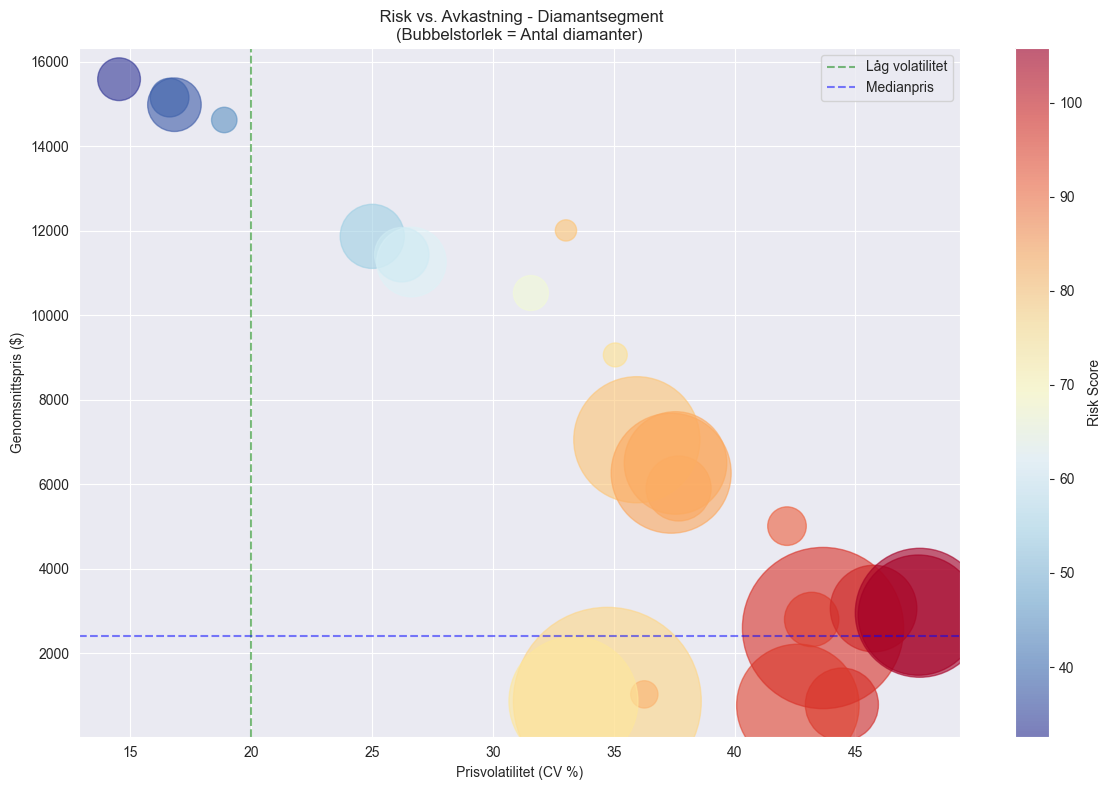

In [18]:
# Riskanalys baserad på prisvolatilitet
risk_analysis = df.groupby(['carat_range', 'cut']).agg({
    'current_price': ['mean', 'std', 'count'],
    'price_change': ['mean', 'std']
}).round(2)

# Flatten columns
risk_analysis.columns = ['Avg_Price', 'Price_Std', 'Count', 'Avg_Change', 'Change_Std']

# Beräkna riskmetriker
risk_analysis['CV'] = (risk_analysis['Price_Std'] / risk_analysis['Avg_Price'] * 100).round(2)  # Coefficient of Variation
risk_analysis['Risk_Score'] = (risk_analysis['CV'] * risk_analysis['Change_Std']).round(2)

# Visa högsta och lägsta risk
high_risk = risk_analysis.nlargest(5, 'Risk_Score')
low_risk = risk_analysis.nsmallest(5, 'Risk_Score')

print("HÖGST RISK (TOP 5)")

display(high_risk[['Avg_Price', 'CV', 'Risk_Score']])

print(" LÄGST RISK (TOP 5)")

display(low_risk[['Avg_Price', 'CV', 'Risk_Score']])

# Visualisera risk vs avkastning
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(risk_analysis['CV'], risk_analysis['Avg_Price'],
                     s=risk_analysis['Count']*2, alpha=0.6,
                     c=risk_analysis['Risk_Score'], cmap='RdYlBu_r')

ax.set_xlabel('Prisvolatilitet (CV %)')
ax.set_ylabel('Genomsnittspris ($)')
ax.set_title(' Risk vs. Avkastning - Diamantsegment\n(Bubbelstorlek = Antal diamanter)')

# Lägg till färgskala
plt.colorbar(scatter, label='Risk Score')

# Markera säkra zoner
ax.axvline(x=20, color='green', linestyle='--', alpha=0.5, label='Låg volatilitet')
ax.axhline(y=df['current_price'].median(), color='blue', linestyle='--', alpha=0.5, label='Medianpris')
ax.legend()

plt.tight_layout()
plt.show()

###  Kundsegmentering och Produktpositionering

###### Baserat på min analys skapar jag kundsegment och produktrekommendationer för Guldfynd.

 KUNDSEGMENTANALYS


,Antal,Medelpris,Min_pris,Max_pris,Medelkarat,Prisändring%
customer_segment,,,,,,
Exklusiv,1645,16809.13,15000.45,19875.30,1.98,0.23
Insteg,14544,708.30,326.28,999.87,0.34,-0.09
Premium,6709,10437.89,2951.30,14996.38,1.53,-0.01
Special tillfälle,15416,4897.60,1261.47,7999.33,1.01,0.02
Vardagslyxig,15626,1834.31,1000.12,2999.27,0.58,0.05


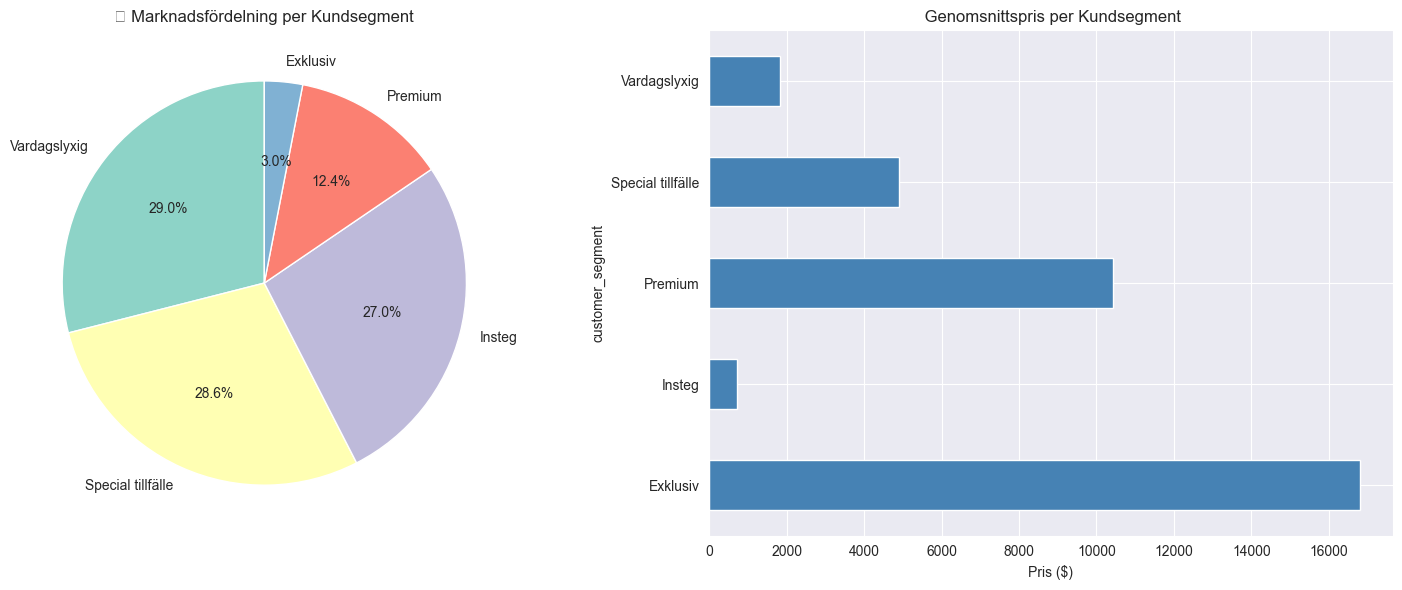

In [20]:
# Definiera kundsegment baserade på prisintervall och popularitet
def classify_segment(row):
    price = row['current_price']
    carat = row['carat']

    if price < 1000:
        return "Insteg"
    elif price < 3000 and carat < 1.0:
        return "Vardagslyxig"
    elif price < 8000 and carat < 1.5:
        return "Special tillfälle"
    elif price < 15000:
        return "Premium"
    else:
        return "Exklusiv"

df['customer_segment'] = df.apply(classify_segment, axis=1)

# Segmentanalys
segment_summary = df.groupby('customer_segment').agg({
    'current_price': ['count', 'mean', 'min', 'max'],
    'carat': 'mean',
    'price_change': 'mean'
}).round(2)

segment_summary.columns = ['Antal', 'Medelpris', 'Min_pris', 'Max_pris', 'Medelkarat', 'Prisändring%']

print(" KUNDSEGMENTANALYS")

display(segment_summary)

# Skapa segment-visualisering
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart för marknadsfördelning
segment_counts = df['customer_segment'].value_counts()
ax1.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%',
        startangle=90, colors=plt.cm.Set3.colors)
ax1.set_title('🥧 Marknadsfördelning per Kundsegment')

# Bar chart för genomsnittspris per segment
segment_summary['Medelpris'].plot(kind='barh', ax=ax2, color='steelblue')
ax2.set_title(' Genomsnittspris per Kundsegment')
ax2.set_xlabel('Pris ($)')

plt.tight_layout()
plt.show()